<img src="https://www.aepia.org/wp-content/uploads/2022/04/logo-aepia.png" width="200"/>

<img src="https://i1.rgstatic.net/ii/lab.file/AS%3A608742152355841%401522146847661_xl" width="300"/>

<img src="https://www.upo.es/cms1/export/sites/upo/comunicacion/imagenes/mic-upo-descargas/Marca-UPO-Horizontal.png" width="200"/>



# **Deep Learning: Image classification**
## Escuela de verano de Inteligencia Artificial 2023
#### José Fco. Torres Maldonado

jftormal@upo.es | datalab.upo.es/torres

---



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from imutils import paths
import keras as keras
import os
import cv2
import zipfile
from sklearn.metrics import confusion_matrix

## 1. Dataset: 25000 fotografías de perros y gatos

Formato .zip<br/>
Nombradas como: cat.XXXX.jpg y dog.XXXX.jpg

In [5]:
zip = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/EVIA2023/dataset.zip", 'r')
zip.extractall("/")
zip.close()

In [6]:
print("Número de imágenes: ", len(os.listdir("/dataset")))
print("Contenido: ", os.listdir("/dataset"))

Número de imágenes:  25000
Contenido:  ['cat.1516.jpg', 'dog.9768.jpg', 'cat.4659.jpg', 'cat.8262.jpg', 'dog.230.jpg', 'dog.9075.jpg', 'cat.8190.jpg', 'cat.2108.jpg', 'cat.11897.jpg', 'dog.1334.jpg', 'cat.11713.jpg', 'cat.508.jpg', 'cat.6619.jpg', 'cat.10387.jpg', 'dog.10853.jpg', 'dog.10995.jpg', 'dog.1347.jpg', 'dog.8607.jpg', 'cat.8634.jpg', 'dog.5245.jpg', 'dog.7788.jpg', 'cat.2687.jpg', 'dog.11264.jpg', 'cat.10763.jpg', 'cat.5573.jpg', 'cat.6121.jpg', 'cat.8198.jpg', 'cat.10046.jpg', 'dog.10166.jpg', 'cat.1439.jpg', 'cat.5755.jpg', 'dog.9507.jpg', 'dog.11252.jpg', 'dog.2156.jpg', 'dog.3344.jpg', 'dog.5414.jpg', 'cat.6242.jpg', 'dog.971.jpg', 'dog.10233.jpg', 'dog.3688.jpg', 'dog.6594.jpg', 'cat.6038.jpg', 'dog.1200.jpg', 'cat.770.jpg', 'cat.5730.jpg', 'cat.3689.jpg', 'cat.9636.jpg', 'cat.3813.jpg', 'dog.10710.jpg', 'cat.5827.jpg', 'dog.7317.jpg', 'cat.1005.jpg', 'dog.917.jpg', 'dog.10143.jpg', 'cat.9812.jpg', 'cat.5288.jpg', 'cat.11348.jpg', 'cat.7419.jpg', 'dog.3625.jpg', 'dog.60

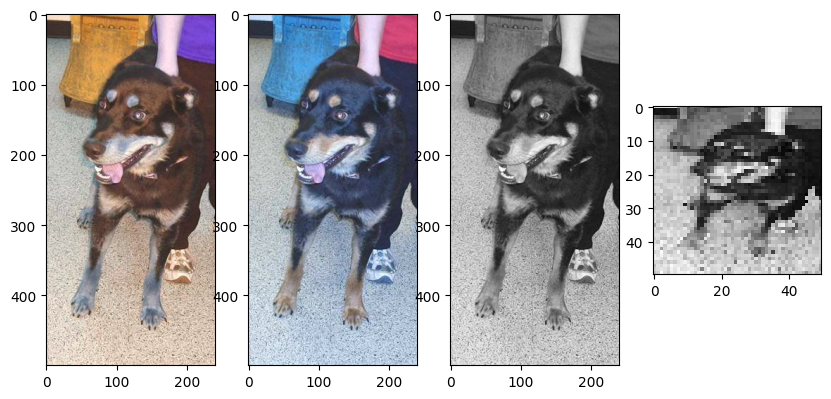

In [7]:
img = cv2.imread('/dataset/dog.7182.jpg')

imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imggray = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2GRAY)
img50x50 = cv2.resize(imggray, (50, 50))

fig, axs = plt.subplots(1, 4, figsize=(10, 10))
axs[0].imshow(img)
axs[1].imshow(imgrgb)
axs[2].imshow(imggray, cmap='gray')
axs[3].imshow(img50x50, cmap="gray")

plt.show()

## 2. Preprocesado

In [8]:
def image_as_vector(img, tam=(50,50)):
    img = cv2.resize(img, tam)
    return img.reshape(50, 50, 3) # UNICO CAMBIO

In [9]:
data = []
labels = []

listaImagenes = list(paths.list_images('/dataset'))
print(listaImagenes[0:5])

['/dataset/cat.1516.jpg', '/dataset/dog.9768.jpg', '/dataset/cat.4659.jpg', '/dataset/cat.8262.jpg', '/dataset/dog.230.jpg']


In [10]:
for (i, imgpath) in enumerate(listaImagenes):
    img = cv2.imread(imgpath)
    label = imgpath.split(os.path.sep)[-1].split(".")[0]
    features = image_as_vector(img)
    data.append((features, imgpath))
    labels.append(label)

In [11]:
print("Total de imágenes:",len(data))
print("Registro:", data[0])
print("Imagen:", data[0][0])
print("Tamaño de cada imagen:", len(data[0][0])) #Equivale a 50x50x3 canales
print("Ruta:", data[0][1])
print("Etiqueta:", labels[0])

Total de imágenes: 25000
Registro: (array([[[201, 196, 193],
        [212, 207, 204],
        [206, 201, 200],
        ...,
        [ 78,  72,  73],
        [ 74,  67,  73],
        [ 62,  73, 105]],

       [[222, 217, 214],
        [200, 195, 192],
        [198, 193, 192],
        ...,
        [ 83,  77,  78],
        [ 74,  69,  68],
        [ 91, 109, 142]],

       [[178, 175, 175],
        [181, 179, 178],
        [163, 161, 160],
        ...,
        [ 45,  35,  40],
        [ 60,  49,  54],
        [ 74,  90, 127]],

       ...,

       [[170, 165, 162],
        [226, 221, 218],
        [183, 183, 183],
        ...,
        [ 90,  82,  91],
        [196, 197, 200],
        [197, 199, 200]],

       [[224, 219, 216],
        [199, 194, 191],
        [203, 202, 202],
        ...,
        [173, 174, 179],
        [188, 190, 191],
        [175, 177, 177]],

       [[214, 210, 206],
        [222, 217, 214],
        [192, 191, 191],
        ...,
        [164, 166, 166],
        [179,

In [12]:
imagesdata = [dat[0] for dat in data]
imagespaths = [dat[1] for dat in data]

print(imagesdata[0])
print(imagespaths[0])

[[[201 196 193]
  [212 207 204]
  [206 201 200]
  ...
  [ 78  72  73]
  [ 74  67  73]
  [ 62  73 105]]

 [[222 217 214]
  [200 195 192]
  [198 193 192]
  ...
  [ 83  77  78]
  [ 74  69  68]
  [ 91 109 142]]

 [[178 175 175]
  [181 179 178]
  [163 161 160]
  ...
  [ 45  35  40]
  [ 60  49  54]
  [ 74  90 127]]

 ...

 [[170 165 162]
  [226 221 218]
  [183 183 183]
  ...
  [ 90  82  91]
  [196 197 200]
  [197 199 200]]

 [[224 219 216]
  [199 194 191]
  [203 202 202]
  ...
  [173 174 179]
  [188 190 191]
  [175 177 177]]

 [[214 210 206]
  [222 217 214]
  [192 191 191]
  ...
  [164 166 166]
  [179 181 182]
  [161 163 164]]]
/dataset/cat.1516.jpg


In [13]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

imgdata = np.array(imagesdata) / 255.0
labels = np_utils.to_categorical(labels,2)

In [14]:
print("Imagen de ejemplo:",imgdata[0])
print("Etiqueta de ejemplo:",labels[0])

Imagen de ejemplo: [[[0.78823529 0.76862745 0.75686275]
  [0.83137255 0.81176471 0.8       ]
  [0.80784314 0.78823529 0.78431373]
  ...
  [0.30588235 0.28235294 0.28627451]
  [0.29019608 0.2627451  0.28627451]
  [0.24313725 0.28627451 0.41176471]]

 [[0.87058824 0.85098039 0.83921569]
  [0.78431373 0.76470588 0.75294118]
  [0.77647059 0.75686275 0.75294118]
  ...
  [0.3254902  0.30196078 0.30588235]
  [0.29019608 0.27058824 0.26666667]
  [0.35686275 0.42745098 0.55686275]]

 [[0.69803922 0.68627451 0.68627451]
  [0.70980392 0.70196078 0.69803922]
  [0.63921569 0.63137255 0.62745098]
  ...
  [0.17647059 0.1372549  0.15686275]
  [0.23529412 0.19215686 0.21176471]
  [0.29019608 0.35294118 0.49803922]]

 ...

 [[0.66666667 0.64705882 0.63529412]
  [0.88627451 0.86666667 0.85490196]
  [0.71764706 0.71764706 0.71764706]
  ...
  [0.35294118 0.32156863 0.35686275]
  [0.76862745 0.77254902 0.78431373]
  [0.77254902 0.78039216 0.78431373]]

 [[0.87843137 0.85882353 0.84705882]
  [0.78039216 0.76

In [15]:
(X_train, X_test, y_train, y_test, trainingpaths, testpaths) = train_test_split(imgdata, labels, imagespaths, test_size=0.30, random_state=42)

In [16]:
print("Tamaño del training:", len(X_train))
print("Tamaño del test:", len(X_test))

Tamaño del training: 17500
Tamaño del test: 7500


## 3. Modelos Deep Learning

### 3.1 Convolutional Neural Network (CNN)

In [27]:
cnnmodel = keras.Sequential()

cnnmodel.add(keras.layers.Conv2D(32, (3,3), input_shape=(50,50,3), activation='relu'))
cnnmodel.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

cnnmodel.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
cnnmodel.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

cnnmodel.add(keras.layers.Flatten())

cnnmodel.add(keras.layers.Dense(128, activation='relu'))
cnnmodel.add(keras.layers.Dense(2, activation='softmax'))

cnnmodel.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
cnnhistory = cnnmodel.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
137/137 [==============================] - 41s 298ms/step - loss: 0.6695 - accuracy: 0.5956
Epoch 2/10
137/137 [==============================] - 43s 316ms/step - loss: 0.6253 - accuracy: 0.6594
Epoch 3/10
137/137 [==============================] - 41s 298ms/step - loss: 0.5983 - accuracy: 0.6808
Epoch 4/10
137/137 [==============================] - 41s 298ms/step - loss: 0.5808 - accuracy: 0.6974
Epoch 5/10
137/137 [==============================] - 41s 297ms/step - loss: 0.5690 - accuracy: 0.7049
Epoch 6/10
137/137 [==============================] - 41s 298ms/step - loss: 0.5578 - accuracy: 0.7175
Epoch 7/10
137/137 [==============================] - 41s 299ms/step - loss: 0.5480 - accuracy: 0.7224
Epoch 8/10
137/137 [==============================] - 46s 336ms/step - loss: 0.5338 - accuracy: 0.7376
Epoch 9/10
137/137 [==============================] - 42s 304ms/step - loss: 0.5256 - accuracy: 0.7399
Epoch 10/10
137/137 [==============================] - 42s 304ms/step - l

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

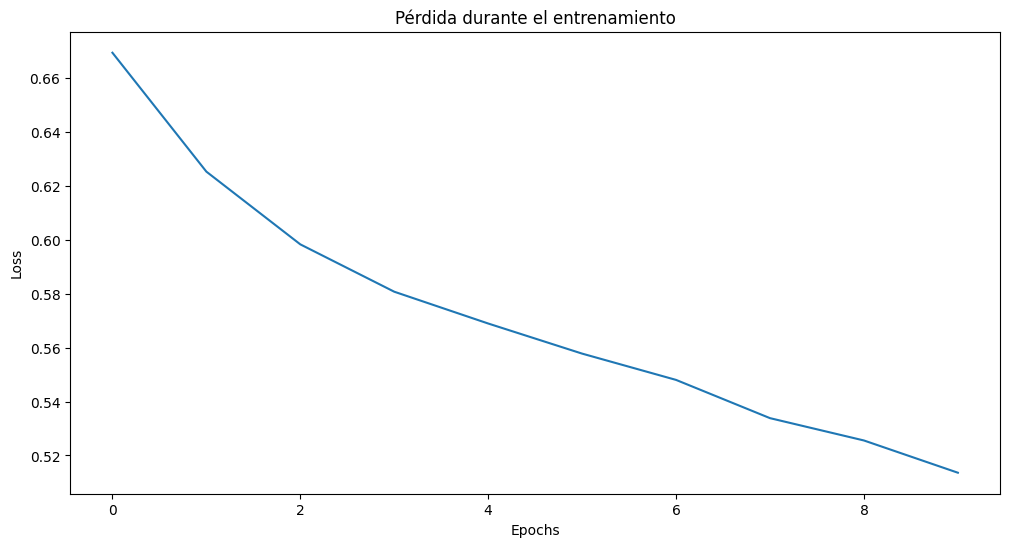

In [29]:
cnnmodel.summary()

# Gráfica de la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(cnnhistory.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [30]:
(loss, accuracy) = cnnmodel.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy*100))

59/59 [==============================] - 6s 98ms/step - loss: 0.5171 - accuracy: 0.7468
loss=0.5171, accuracy: 74.6800%


In [31]:
probabilities = cnnmodel.predict(X_test)
predictions = np.round(np.argmax(probabilities, axis=1)).astype(int)

235/235 [==============================] - 5s 23ms/step


In [22]:
real = np.argmax(y_test, axis=1) # y_test contiene por cada imagen un vector [X,Y]. Si X vale 1 -> gato; si Y vale 1 -> perro. Esta línea se queda con el índice para saber si es clase 0 (gato) o clase 1 (perro). codificación ONE-HOT

## Análisis de las predicciones

In [32]:
def mostrar_resultado(idImagen):
    clase_real = "gato" if real[idImagen] == 0 else "perro"
    clase_predicha = "gato" if predictions[idImagen] == 0 else "perro"
    rutabase = "/dataset"
    fullpath = testpaths[idImagen]
    image = cv2.imread(fullpath)
    imgrgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(imgrgb)
    plt.axis('off')
    plt.show()
    print("CLASE REAL: \t", clase_real)
    print("CLASE PREDICHA:\t", clase_predicha)
    return fullpath

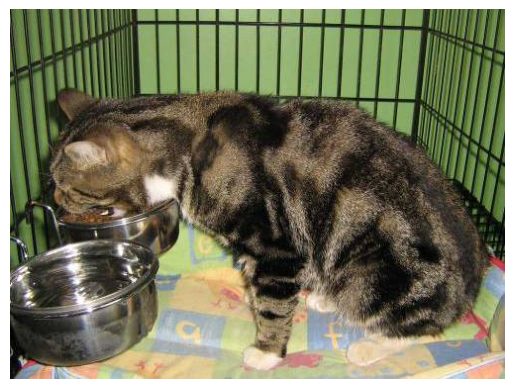

CLASE REAL: 	 gato
CLASE PREDICHA:	 gato


'/dataset/cat.7743.jpg'

In [33]:
mostrar_resultado(1444)

In [34]:
# Calcular la exactitud (accuracy)
accuracy = accuracy_score(real, predictions)
print("ACC (%): ", accuracy*100)

# Calcular la precisión (precision)
precision = precision_score(real, predictions)
print("precision : ", precision)

# Calcular la exhaustividad (recall)
recall = recall_score(real, predictions)
print("recall : ", recall)

# Calcular la puntuación F1
f1 = f1_score(real, predictions)
print("F1 : ", f1)

# Calcular el área bajo la curva ROC (AUC-ROC)
auc_roc = roc_auc_score(real, predictions)
print("AUC : ", auc_roc)

ACC (%):  74.68
precision :  0.7228166210500124
recall :  0.7872628726287263
F1 :  0.7536645479309898
AUC :  0.7474372105925784


In [35]:
cm = confusion_matrix(real, predictions)
print(cm)

[[2696 1114]
 [ 785 2905]]
